Task1_0531. auto-mpg.csv 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
# 0. 데이터 불러오기
# 1. 전처리 (horsepower object. ? 로 되어 있음. uinque이나 astype으로 확인 필요. ? 제거 필요)
# 2. 데이터 확인
# 3. 분석용 데이터 구축
# 4. 모델 검증

### 0. 데이터 불러오기

In [1]:
# 0-1. 구글 코랩 마운트
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 0-2. 파일 불러오기
from google.colab import files
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/KDT_240424/m3_분석라이브러리/dataset/auto-mpg.csv',index_col=8)
# index_col=8 로 car name이 인덱스가 되도록

In [6]:
# 0-3. 파일 확인
print(df,type(df))

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   
...                         ...        ...           ...        ...     ...   
ford mustang gl            27.0          4         140.0         86    2790   
vw pickup                  44.0          4          97.0         52    2130   
dodge rampage              32.0          4         135.0         84    2295   
ford ranger                28.0          4         120.0         79    2625   
chevy s-10                 31.0          4         1

### 1. 데이터 전처리

In [ ]:
# 1-0. 결측치 및 전반적인 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 28.0+ KB


In [ ]:
# 1-1. 수정 필요 데이터 : horsepower "object"

In [ ]:
# 이상 데이터 어떻게 찾지?
# int가 아닌 데이터 찾기


In [7]:
# 결측값 처리 방법:
import numpy as np
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

# 안바뀌면 아래처럼 바꿔줘야 함
df = df.astype({'horsepower': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6+ KB


In [8]:
# 2-1. 데이터 확인
df_describe=df.describe()
print(df_describe)

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [9]:
# 2-1.0. df 카피
df1=df.copy()

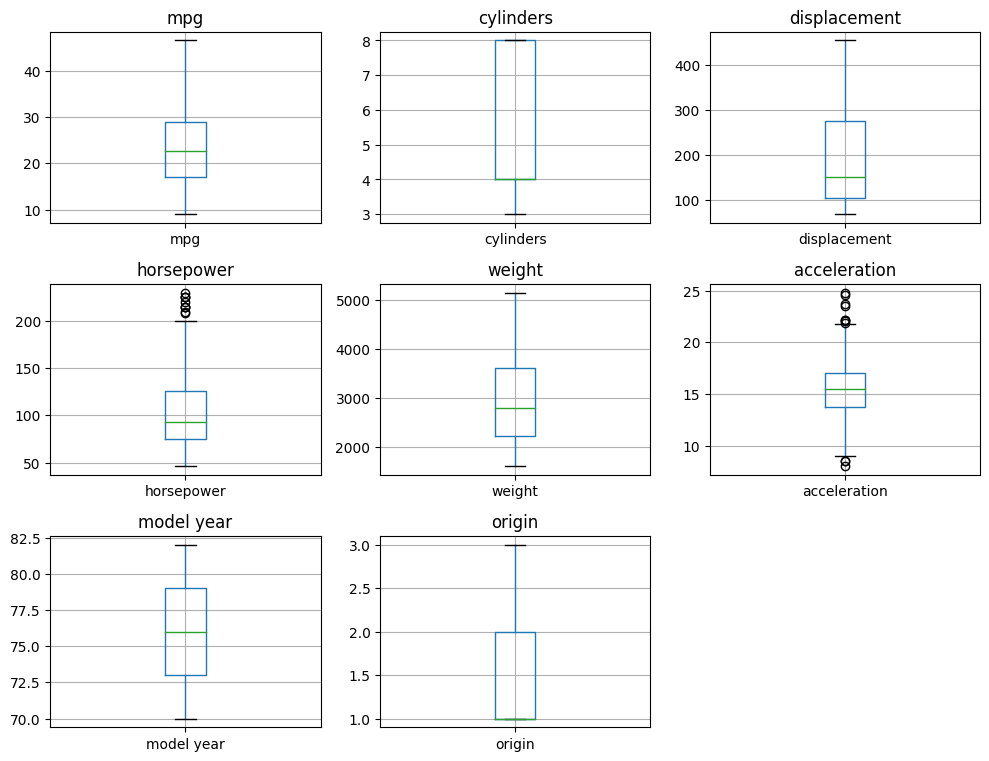

In [10]:
# 2-1-1. 그 외 변수에 대한 그래프 그려보기
# 1) 한번에 여러 그래프를 그려서 보기 - (1) 박스플롯
import matplotlib.pyplot as plt
num_columns=len(df1.columns) # 컬럼 수 확인해서 컬럼수 만큼 그래프 생성하기

plt.figure(figsize=(10,10)) # figsize=가로길이, 세로길이. inch 단위임

# for문 사용해서 한번에 여러 그래프 생성하기
for i, column in enumerate(df1.columns):
    plt.subplot(4,3,i+1)
    df1.boxplot(column=column)
    plt.title(column)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [11]:
# 2-1-2. 상관계수 계산
df1_corr=df1.corr()
print(df1_corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

In [ ]:
# 2-1-3. pivot으로 변수 간의 관계를 다각도에서 보기
# 상관관계 높은 변수들 (abs 0.6 이상):
# mpg : cylinders, displacement, horsepower, weight
# cylinders : displacement, horsepower, weight
# displacement : horsepower, weight
# horsepower : weight, acceleration

# pivot :
# 피벗 만들기 위해서는 구간 지정이 필요할 듯?

# displacement
# def displacement(x):
#     if x<105:
#         return "below 25%"
#     elif x<151:
#         return "below 50%"
#     elif x<275.75:
#         return "below 75%"
#     else:
#         return "above 75%"

# df1_displacement=df1.replace['displacement'].apply(lambda x:displacement(x))


In [23]:
# 2-1-4. 타겟 변수와 상관관계가 높은 변수 선택
# 분석할 컬럼 설렉
# mpg : cylinders, displacement, horsepower, weight
df1_corr=df1.corr()
target_variable='mpg'
df1_corr[[target_variable]]

correlated_features=df1_corr[target_variable][abs(df1_corr[target_variable])>0.6].index.tolist()
print("돌려볼 변수 : \n",correlated_features)


돌려볼 변수 : 
 ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']


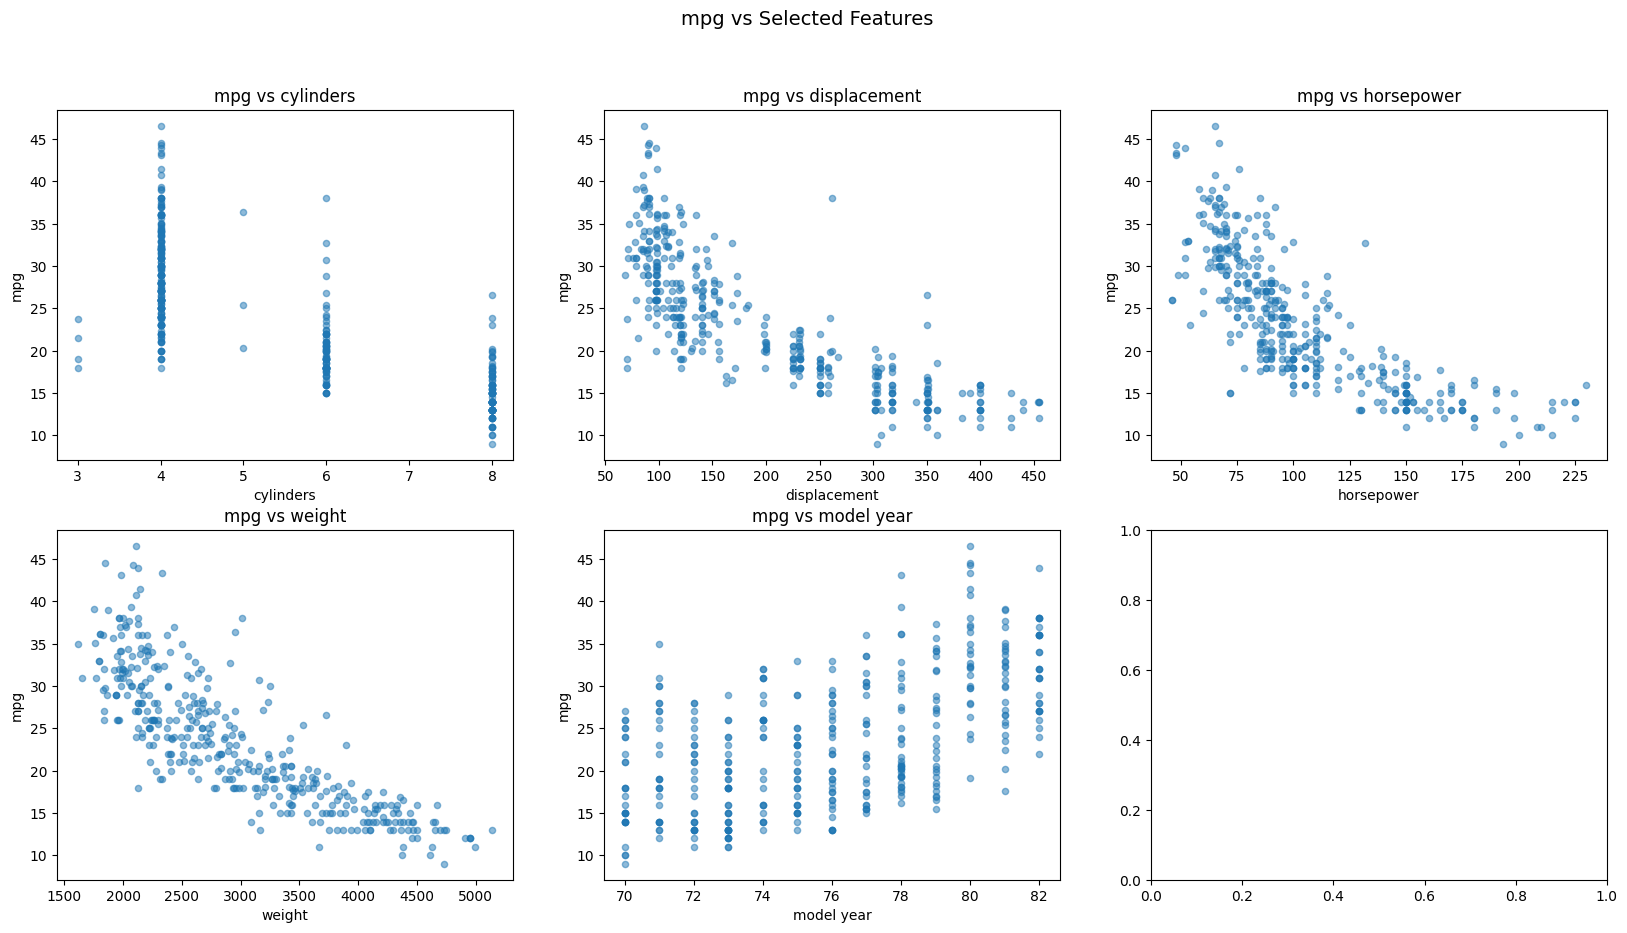

In [22]:
# 3. 분석용 데이터 구축
# 분석용 데이터 구축
variables=['cylinders', 'displacement', 'horsepower', 'weight', 'model year']
target='mpg'

# 데이터 세트 확인
fig, axes=plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for i, col in enumerate(variables):
    row, col_idx=divmod(i,3)
    df1.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')

fig.suptitle(f'{target} vs Selected Features', fontsize=14)
plt.tight_layout
plt.show()


In [20]:
# 3. 분석용 데이터 구축
# 분석용 데이터 구축
from sklearn.preprocessing import StandardScaler

variables=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']
analysis_df1=df1[variables]
target_variable='mpg'

# data set 확인
print(analysis_df1.head())

# 데이터 표준화
scaler=StandardScaler()
scaled_features=scaler.fit_transform(analysis_df1.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df1=pd.DataFrame(scaled_features, columns=analysis_df1.columns.drop(target_variable))
scaled_df1[target_variable]=analysis_df1[target_variable].values

# 데이터셋 확인
print(scaled_df1.head())



                            mpg  cylinders  displacement  horsepower  weight
car name                                                                    
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504
buick skylark 320          15.0          8         350.0       165.0    3693
plymouth satellite         18.0          8         318.0       150.0    3436
amc rebel sst              16.0          8         304.0       150.0    3433
ford torino                17.0          8         302.0       140.0    3449
   cylinders  displacement  horsepower    weight   mpg
0   1.483947      1.077290    0.664133  0.620540  18.0
1   1.483947      1.488732    1.574594  0.843334  15.0
2   1.483947      1.182542    1.184397  0.540382  18.0
3   1.483947      1.048584    1.184397  0.536845  16.0
4   1.483947      1.029447    0.924265  0.555706  17.0


In [21]:
# 4. 모델 검증
from sklearn.model_selection import train_test_split # <= 학습 데이터와 테스트 데이터를 나눠줌
from sklearn.linear_model import LinearRegression # <= 선형 회귀분석 모델링을 위해 필요
from sklearn.metrics import mean_squared_error # <= 개발한 모델 평가를 오차(mean_squared_error)를 통해 진행
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df1.drop(columns=[target_variable]) # <= 독립변수만 얻기 위해 drop해줌
y = scaled_df1[target_variable] # <= 독립변수로 분리

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression() # <= 모델 만들기
model.fit(X_train, y_train) # <= 무엇으로 학습하며 모델을 만들지. fit()으로 트레이닝 시킴

# 예측
y_pred = model.predict(X_test) # <= 예측 함수에 테스트 데이터의 독립변수를 넣어주면 예측을 돌림

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred) # <= y_test : 실제 값 y_pred : 예측값. 이 둘을 넣어서 예측값과 실제값 사이의 차이를 확인하여 오차 확인
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) # <= 얼마나 이 모델로 현상을 설명할 수 있는지 알 수 있음.

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 17.89
Root Mean Squared Error: 4.23
R-squared: 0.65


### 다른 사람들 풀이

In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = '/content/drive/MyDrive/KDT_240424/m3_분석_라이브러리/pandas/m_3_datas/auto-mpg.csv'

# df = pd.read_csv(file_path)
df = pd.read_csv(file_path)

# 파일 확인
print(df)
df.info()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

df = df.astype({'horsepower': 'float64'})



df.plot.box()
plt.title('Check Box')
plt.show()

# 데이터프레임의 열 수
num_columns = len(df.columns)

# 그래프의 크기 설정
plt.figure(figsize =(12, 12))

# 각 열에 대한 박스풀롯을 그립니다
for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i+1)
    df.boxplot(column=column)
    plt.title(column)

# 레이아웃을 조정합니다
plt.tight_layout()
plt.show()

correlation_matrix = df.corr()
print(correlation_matrix, '\n')

target_variable = 'mpg'
correlation_threshold = 0.5
correlation_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > correlation_threshold].index.tolist()
print(correlation_features)

from sklearn.preprocessing import StandardScaler

analysis_df = df[correlation_features]
target_variable = 'mpg'

# print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns = [target_variable]))

# print(scaled_features)

# 데이터 프레임으로 전환
scaled_df = pd.DataFrame(scaled_features, columns = analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values
print(scaled_df)

### 강사님

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Google Colab에서 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

Saving auto-mpg.csv to auto-mpg.csv


In [26]:
# 데이터 확인
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [27]:
# 이상한 데이터 찾기
# horsepower는 int/float여야하는데 object로 되어 있으니 해당 변수의 고유값 확인 (중복없이)
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [28]:
# 결측값처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

# 'car name'은 불필요하여 열 제거
df=df.drop(columns=['car name'])

# 데이터 재확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB
None


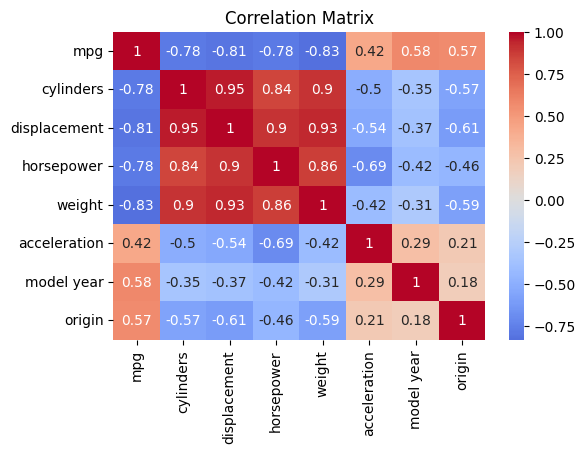

In [31]:
# 탐색적 데이터 분석
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',center=0)
# center=0 : 색상 맵의 중앙값이 0.0보다 큰 값과 작은 값을 다른 색으로 표시
plt.title('Correlation Matrix')
plt.show()

In [33]:
# 변수 선정 (상관계수 기반)
target_variable='mpg'
correlation_threshold=0.5
correlated_features=df.corr()[target_variable][abs(df.corr()[target_variable])>correlation_threshold].index.tolist()


# 파생 변수 생성 : e.g. 중량 대비 마력비 (horsepower-to-weight ratio)
df['hp_to_weight']=df['horsepower']/df['weight']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_to_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591


In [34]:
# 분석용 데이터셋 구축
selected_features=correlated_features+['hp_to_weight']
analysis_df=df[selected_features]

In [35]:
# 데이터 표준화
scaler=StandardScaler()
scaled_features=scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df=pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable]=analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

   cylinders  displacement  horsepower    weight  model year    origin  \
0   1.483947      1.077290    0.664133  0.620540   -1.625315 -0.716641   
1   1.483947      1.488732    1.574594  0.843334   -1.625315 -0.716641   
2   1.483947      1.182542    1.184397  0.540382   -1.625315 -0.716641   
3   1.483947      1.048584    1.184397  0.536845   -1.625315 -0.716641   
4   1.483947      1.029447    0.924265  0.555706   -1.625315 -0.716641   

   hp_to_weight   mpg  
0      0.382496  18.0  
1      1.661177  15.0  
2      1.488456  18.0  
3      1.494892  16.0  
4      0.971505  17.0  


In [36]:
# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train) # .fit() 이 주어진 훈련 데이터로 학습을 진행함

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10.139094603469605
Root Mean Squared Error: 3.1841944983731136
R-squared: 0.8013522973313041
